# Task 7 : Stock Market Prediction using Numerical and Textual Analysis
## Task Objective : Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines
-Himangshu Baruah

# Part 1 : Stock Price Analysis

## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 

from keras.models import Sequential
from keras.layers import Dense, LSTM , Dropout

import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

import math

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Importing the stock data

In [ ]:
stock_price_data =pd.read_csv('/content/drive/MyDrive/The Sparks foundation /task 7/stock_price.csv')
stock_price_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [ ]:
stock_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4277 non-null   object 
 1   Open       4277 non-null   float64
 2   High       4277 non-null   float64
 3   Low        4277 non-null   float64
 4   Close      4277 non-null   float64
 5   Adj Close  4277 non-null   float64
 6   Volume     4277 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 234.0+ KB


## Visualising the stock data

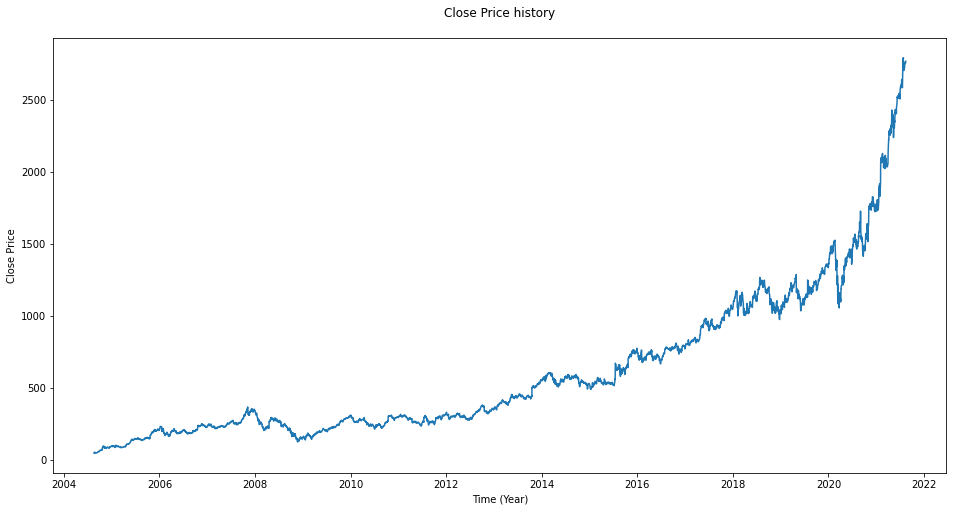

In [ ]:
stock_price_data['Date'] = pd.to_datetime(stock_price_data.Date,format='%Y-%m-%d')
stock_price_data.index = stock_price_data['Date']
stock_price_data.dropna(inplace=True)

plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(stock_price_data['Close'])

In [ ]:
np.random.seed(10)

## Data precprocessing

### Creating the dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/The Sparks foundation /task 7/stock_price.csv', usecols=[5], engine='python')
df.dropna(inplace=True)
df = df.values
df = df.astype('float32')

### Standardising the dataframe

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

# split into train and test sets 
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size
train, test = df[0:train_size,:], df[train_size:len(df),:]

In [ ]:
len(df)

4277

In [ ]:
len(train)

3421

In [ ]:
train.shape

(3421, 1)

### Creating a Data Sructures with 120 timesteps and 1 outputs

 i.e. at each time t , the model is going to look at 120 stock prices before time t. 

In [ ]:
xtrain = []
ytrain = []
for i in range(120,3421):
  xtrain.append(train[i-120:i,0])
  ytrain.append(train[i,0])
xtrain,ytrain= np.array(xtrain) , np.array(ytrain)

In [ ]:
xtrain.shape

(3301, 120)

### Reshaping the data from 2d array to 3d array:

In [ ]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [ ]:
xtrain.shape

(3301, 120, 1)

## Building the model (RNN Model) :

In General , for analysing the stock prices , RNN ( Recuurent Neural Networks ) is used 

### RNN model with 4 hidden layers , each having 100 neurons

In [ ]:
model=Sequential()

model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))


model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))

model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

In [ ]:
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(xtrain, ytrain, validation_split=0.2, epochs=50, batch_size=20, verbose=2)

# compiling and fitting the model
model.compile(loss='mse' , optimizer='adam')
model.fit(xtrain, ytrain, validation_split=0.2, epochs=10, batch_size=8, verbose=1)

Epoch 1/10
330/330 [==============================] - 93s 264ms/step - loss: 2.2727e-04 - val_loss: 4.8616e-04
Epoch 2/10
330/330 [==============================] - 88s 266ms/step - loss: 8.9169e-05 - val_loss: 1.5912e-04
Epoch 3/10
330/330 [==============================] - 85s 258ms/step - loss: 6.7889e-05 - val_loss: 1.2174e-04
Epoch 4/10
330/330 [==============================] - 85s 258ms/step - loss: 5.7159e-05 - val_loss: 3.2413e-04
Epoch 5/10
330/330 [==============================] - 85s 258ms/step - loss: 5.4565e-05 - val_loss: 1.8900e-04
Epoch 6/10
330/330 [==============================] - 85s 257ms/step - loss: 5.1778e-05 - val_loss: 6.4376e-04
Epoch 7/10
330/330 [==============================] - 85s 257ms/step - loss: 6.0782e-05 - val_loss: 1.1354e-04
Epoch 8/10
330/330 [==============================] - 85s 256ms/step - loss: 3.9523e-05 - val_loss: 1.8752e-04
Epoch 9/10
330/330 [==============================] - 85s 258ms/step - loss: 4.1039e-05 - val_loss: 6.5742e-05
E

## Making predictions

### Creating the input in the proper format

In [ ]:
inputs = df[len(df)-len(test)-120:]
inputs.reshape(-1,1)
# inputs = scaler.transform(inputs)

array([[0.32798332],
       [0.3314867 ],
       [0.32935768],
       [0.33100545],
       [0.3287781 ],
       [0.33544213],
       [0.3386976 ],
       [0.33800858],
       [0.33640456],
       [0.3424744 ],
       [0.34195673],
       [0.34263116],
       [0.3434769 ],
       [0.34354252],
       [0.34377217],
       [0.34072453],
       [0.34209162],
       [0.33489168],
       [0.33565354],
       [0.3366707 ],
       [0.33638996],
       [0.35341835],
       [0.35263085],
       [0.35245955],
       [0.35568953],
       [0.35571867],
       [0.3582341 ],
       [0.35583532],
       [0.35854393],
       [0.36092085],
       [0.35778934],
       [0.3566264 ],
       [0.35578066],
       [0.3558718 ],
       [0.35401618],
       [0.35824138],
       [0.35335273],
       [0.35309386],
       [0.35896683],
       [0.35950273],
       [0.3611979 ],
       [0.36615586],
       [0.3636769 ],
       [0.3542896 ],
       [0.35419846],
       [0.35010087],
       [0.34591216],
       [0.348

In [ ]:
len(inputs)

976

In [ ]:
X_test = []
for i in range(120,976):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)


In [ ]:
X_test.shape

(856, 120)

### making prediction

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

### Real stock price vs Prediction of stock price for last 850 days

<function matplotlib.pyplot.show>

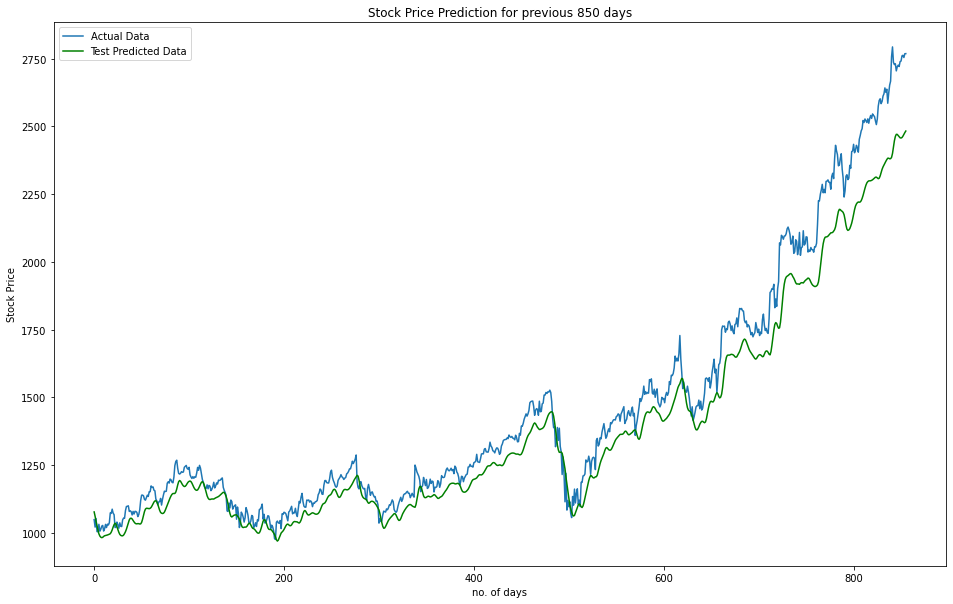

In [ ]:
plt.figure(figsize=(16,10))
plt.plot(scaler.inverse_transform(df[len(df)-len(test):,:]), label = 'Actual Data')
plt.title('Stock Price Prediction for previous 850 days')
plt.xlabel('no. of days')
plt.ylabel('Stock Price')
plt.plot(predicted_stock_price, color='green', label = 'Test Predicted Data')

plt.legend(loc='best')
plt.show

# Part 2 - Textual Data(News Headlines) Analysis

## Importing the Dataset

In [ ]:
from textblob import TextBlob
from datetime import datetime

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/The Sparks foundation /task 7/india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
data.tail()

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


## Data Preprocessing

In [ ]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3424062     True
3424063     True
3424064     True
3424065     True
3424066     True
Name: publish_date, Length: 3424067, dtype: bool

### Removing duplicates

In [ ]:

data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [ ]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


### coverting the column 'Date' to type 'datetime'

In [ ]:
# dropping duplicates
data = data.drop_duplicates()

# coverting the column 'Date' to type 'datetime'
data['Date'] = data['Date'].astype(str)
data['Date'] = data['Date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7262 entries, 0 to 7261
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              7262 non-null   int64         
 1   Date               7262 non-null   datetime64[ns]
 2   headline_category  7262 non-null   object        
 3   headline_text      7262 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 283.7+ KB


In [ ]:
data['headline_category'].value_counts()

unknown                                 987
entertainment.hindi.bollywood           727
india                                   342
life-style.relationships.man-woman      332
edit-page                               256
                                       ... 
tv.news.malayalam                         1
best-products.electronics.headphones      1
sports.more-sports.shooting               1
city.jammu                                1
silver-jubilee                            1
Name: headline_category, Length: 324, dtype: int64

## Representing number of headline text (News Headline) per city

In [ ]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data

,index,Date,headline_category,headline_text
8,642,2001-01-10,city.patna,Fend for yourselves; Pande tells doctors
48,2215,2001-03-09,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,2001-05-22,city.pune,She turned and fought
116,4693,2001-05-27,city.bengaluru,Need to boost exports; says bank head
118,4917,2001-05-29,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7245,3415584,2020-12-15,city.nagpur,1;147 RT-PCR tests in a day; only 3 found +ve ...
7248,3417083,2020-12-18,city.ahmedabad,Cops; panch witnesses sniffed suspects' mouths...
7249,3417582,2020-12-19,city.mumbai,Rally champion only crowned if half WRC season...
7253,3419580,2020-12-23,city.vadodara,Sawmill in Makarpura GIDC gutted; none hurt


In [ ]:
city_split = pd.DataFrame(columns=['city_name'])

In [ ]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [ ]:

city_data = pd.concat([city_data,city_split],axis=1)

In [ ]:
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [ ]:
city_data.head()

,index,Date,headline_text,city_name
8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,4563,2001-05-22,She turned and fought,pune
116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [ ]:
city_data.drop(['index'],axis=1)

,Date,headline_text,city_name
8,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,2001-05-22,She turned and fought,pune
116,2001-05-27,Need to boost exports; says bank head,bengaluru
118,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
7245,2020-12-15,1;147 RT-PCR tests in a day; only 3 found +ve ...,nagpur
7248,2020-12-18,Cops; panch witnesses sniffed suspects' mouths...,ahmedabad
7249,2020-12-19,Rally champion only crowned if half WRC season...,mumbai
7253,2020-12-23,Sawmill in Makarpura GIDC gutted; none hurt,vadodara


In [ ]:
city_data.city_name.unique()

array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', 'goa', 'nagpur', 'guwahati', 'rajkot', 'bhubaneswar',
       'surat', 'allahabad', 'varanasi', 'vadodara', 'mangaluru',
       'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur', 'thane',
       'hubballi', 'kochi', 'navimumbai', 'gurgaon', 'indore', 'kolhapur',
       'agartala', 'madurai', 'bareilly', 'aurangabad', 'meerut',
       'visakhapatnam', 'trichy', 'coimbatore', 'jammu', 'dehradun',
       'nashik', 'noida', 'puducherry', 'erode', 'chennai', 'jind',
       'ghaziabad', 'bhopal', 'jamshedpur', 'vijayawada', 'agra',
       'shimla', 'amritsar'], dtype=object)

In [ ]:
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [ ]:
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)

### Top 20 cities which have high number of headlines texts.

In [ ]:
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_20_headline_city = city_headline.head(20)
top_20_headline_city

,Number_of_headline_text
city_name,
bengaluru,113
ahmedabad,81
delhi,81
mumbai,79
hyderabad,72
pune,59
patna,54
chandigarh,52
nagpur,49


### Visualising the top 20 cities with highest no.of headlines

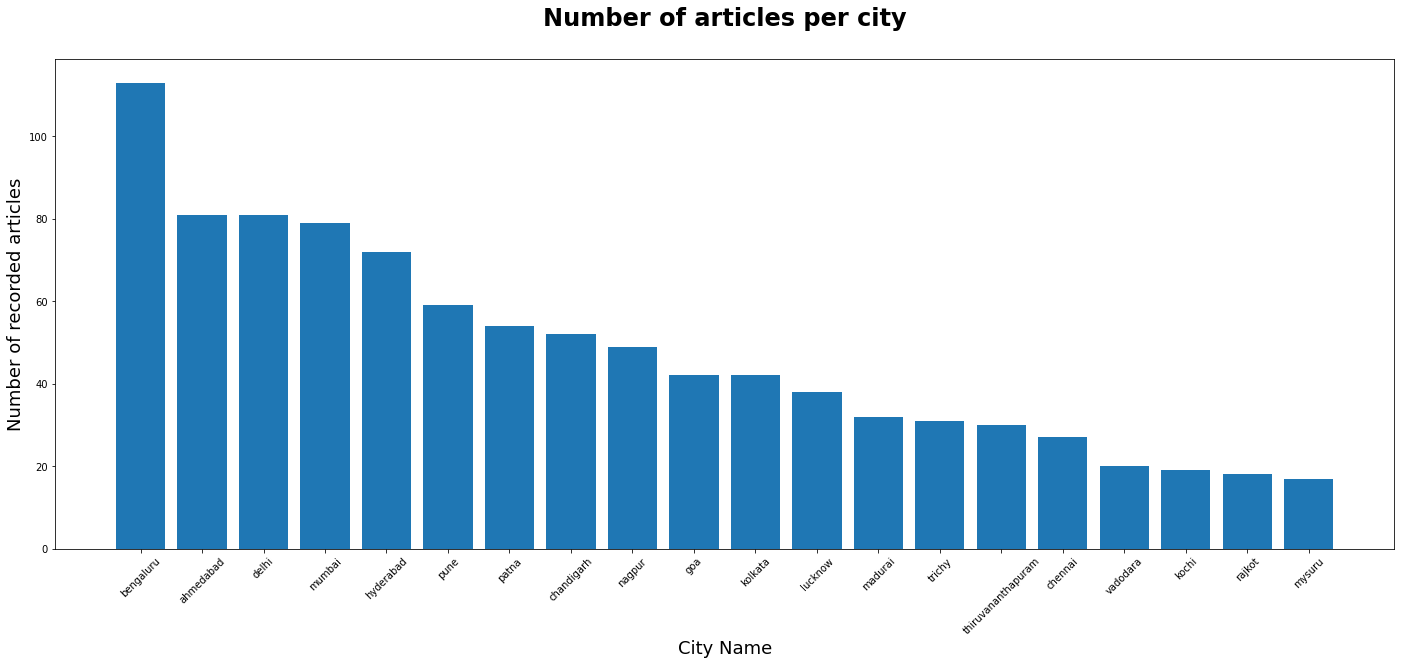

In [ ]:
plt.figure(figsize=(24,9))
plt.bar(top_20_headline_city.index,height=top_20_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

## Representing Number of News Headlines per year and per city

In [ ]:
city_data.rename(columns={'publish_date': 'Date'},inplace = True)
city_data.head()

,index,Date,headline_text,city_name
8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,4563,2001-05-22,She turned and fought,pune
116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [ ]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,index,Date,headline_text,city_name
8,642,2001-01-10,Fend for yourselves; Pande tells doctors,patna
48,2215,2001-03-09,Maneka asks govt to take back land for cow she...,delhi
114,4563,2001-05-22,She turned and fought,pune
116,4693,2001-05-27,Need to boost exports; says bank head,bengaluru
118,4917,2001-05-29,US visit won't be piece of cake for Krishna,bengaluru


In [ ]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [ ]:
city_data.drop(columns=['Date','index'],axis=1,inplace=True)
city_data.head()

,headline_text,city_name,Year
8,Fend for yourselves; Pande tells doctors,patna,2001
48,Maneka asks govt to take back land for cow she...,delhi,2001
114,She turned and fought,pune,2001
116,Need to boost exports; says bank head,bengaluru,2001
118,US visit won't be piece of cake for Krishna,bengaluru,2001


In [ ]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

city_data_2.head()

,city_name,Year,Number_of_headline_text
8,patna,2001,1
48,delhi,2001,1
114,pune,2001,1
116,bengaluru,2001,1
118,bengaluru,2001,1


### The top 7 cities

In [ ]:
top_20_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,113
ahmedabad,81
delhi,81
mumbai,79
hyderabad,72
pune,59
patna,54


In [ ]:
city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_patna = city_data_2[city_data_2.city_name == 'patna']

In [ ]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_patna]
data_famous_cities = pd.concat(famous_cities)

In [ ]:
data_famous_cities.reset_index(inplace=True)

In [ ]:
print(data_famous_cities.shape)
data_famous_cities.head()

(539, 4)


,index,city_name,Year,Number_of_headline_text
0,116,bengaluru,2001,1
1,118,bengaluru,2001,1
2,119,bengaluru,2001,1
3,135,bengaluru,2001,1
4,138,bengaluru,2001,1


In [ ]:

# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()

In [ ]:
city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,patna,pune
Year,,,,,,,
2001,12.0,24.0,7.0,11.0,12.0,15.0,10.0
2002,5.0,5.0,1.0,8.0,6.0,4.0,8.0
2003,8.0,8.0,3.0,4.0,9.0,2.0,4.0
2004,11.0,2.0,16.0,7.0,9.0,4.0,12.0
2005,6.0,12.0,17.0,NaN,1.0,NaN,2.0


In [ ]:
city_year_count.head()

Year
2001    124
2002     54
2003     62
2004     92
2005     43
Name: Number_of_headline_text, dtype: int64

### Visualising the Number of articles per year and per city

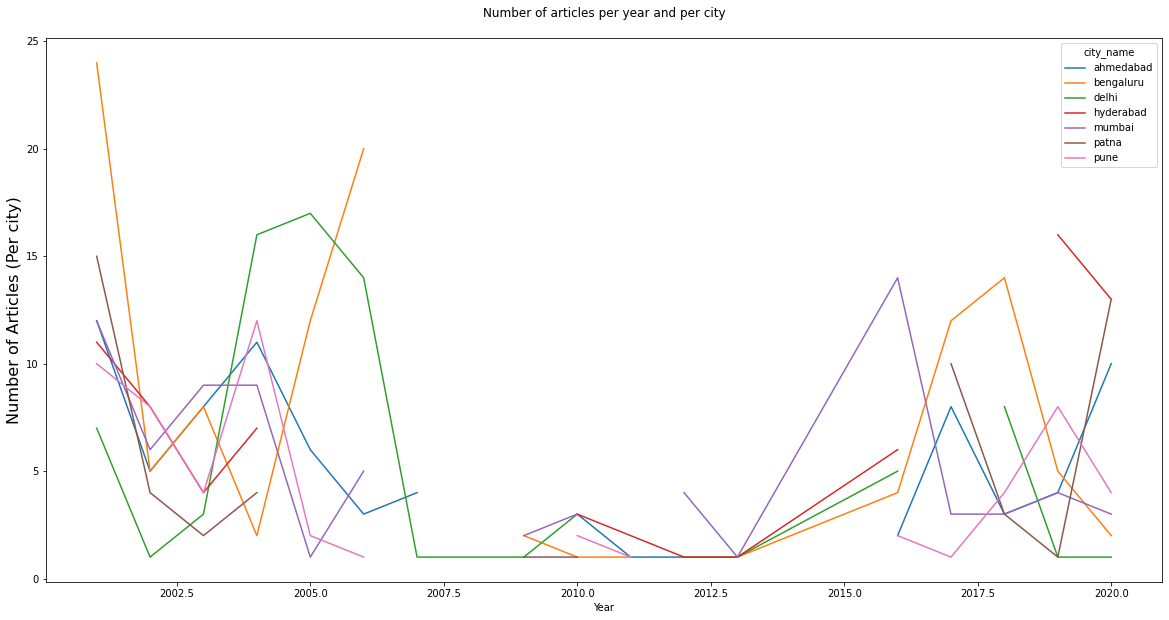

<Figure size 1440x720 with 0 Axes>

In [ ]:

fig=plt.figure()

a = fig.add_subplot(111,label="1")

plt.figure(figsize=(20,10))

city_count.plot(ax=a,figsize=(20,10),title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)', size =16)
a.yaxis.tick_left()
a.set_xlabel('Year') 

plt.show()

### Visualising the no. of articles per year.

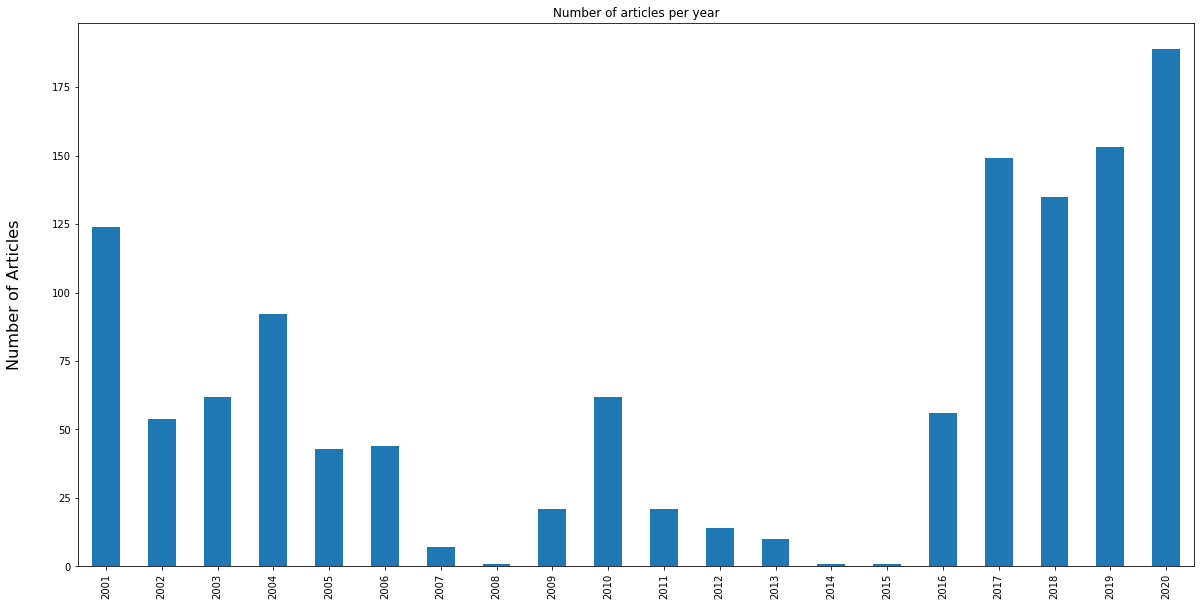

<Figure size 1440x720 with 0 Axes>

In [ ]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year")
a.set_ylabel('Number of Articles',size=16)
a.set_xlabel("")
a.get_yaxis().set_label_coords(-.05,0.5)
plt.show()

## Sentiment Analysis of News Headlines

In [ ]:

def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [ ]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,650
neutral,4868
positive,1744


In [ ]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    24.015423
Name: positive, dtype: float64


Negative Headlines:  headline_text    8.950702
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    67.033875
Name: neutral, dtype: float64


### Overall Sentiment Distribution Pie Chart

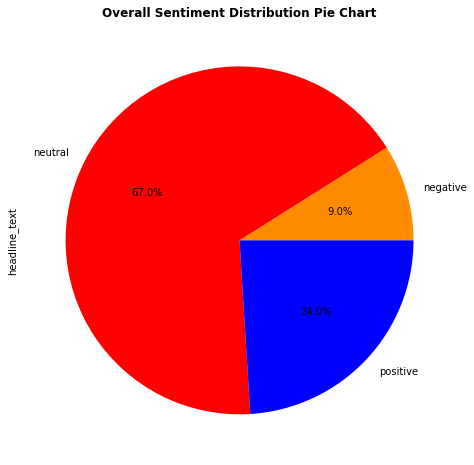

In [ ]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%',colors = ['darkorange', 'red','blue'])
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

# Part 3 - Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

## Importing the Libraries and the datasets

In [ ]:

!pip install vaderSentiment

In [ ]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
stock_data =pd.read_csv('/content/drive/MyDrive/The Sparks foundation /task 7/stock_price.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [ ]:
stock_headlines = pd.read_csv('/content/drive/MyDrive/The Sparks foundation /task 7/india-news-headlines.csv')
stock_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
# coverting the column 'Date' to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()

In [ ]:
stock_headlines.rename(columns={'publish_date': 'Date'},inplace = True)
stock_headlines.head()

,Date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic


### Creating Hybrid data from Numerical and Textual Data

In [ ]:

hybrid_data = pd.concat([stock_data, stock_headlines], axis=1)

In [ ]:
hybrid_data.dropna(axis=0, inplace=True)
hybrid_data

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,2001-01-02,unknown,America's unwanted heading for India?
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...,...,...,...,...,...,...,...
4272,2021-08-09,2738.979980,2766.429932,2728.574951,2760.040039,2760.040039,618700.0,2001-05-13,unknown,Backed by deputy mayor; resident flouts buildi...
4273,2021-08-10,2761.590088,2771.030029,2744.530029,2761.929932,2761.929932,801700.0,2001-05-13,unknown,Hotel Ashok murder: Cops find suspects' photos
4274,2021-08-11,2765.659912,2776.955078,2747.000000,2753.790039,2753.790039,760200.0,2001-05-13,unknown,Get those muscles moving
4275,2021-08-12,2754.260010,2768.360107,2735.580078,2767.790039,2767.790039,732300.0,2001-05-13,unknown,Nightingale awards to 22 nurses


## Performing Sentiment Analysis on Hybrid Data

### Sentiment Analysis using TextBlob

In [ ]:

def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,2001-01-02,unknown,America's unwanted heading for India?,neutral
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive


In [ ]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [ ]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment,neutral,positive
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral,1,0
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,2001-01-02,unknown,America's unwanted heading for India?,neutral,1,0
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral,1,0
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive,0,1


## Adding subjectivity and polarity Scores to Textual Data (News Headlines)

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.000000,0.00
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral,1,0,0.000000,0.00
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,2001-01-02,unknown,America's unwanted heading for India?,neutral,1,0,0.000000,0.00
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral,1,0,0.000000,0.00
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive,0,1,0.241667,0.05


### Visualizing the polarity and Subjectivity scores

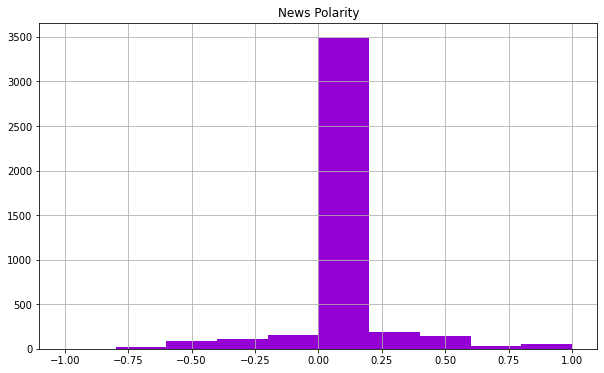

In [ ]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist(color = 'darkviolet')

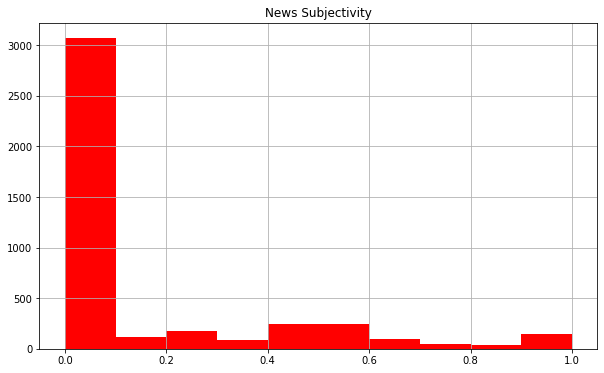

In [ ]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist(color = 'red')

### Performing Sentiment Analysis over the news Headlines of Hybrid Data

In [ ]:

senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,1,0,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,2001-01-02,unknown,Fissures in Hurriyat over Pak visit,neutral,1,0,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,2001-01-02,unknown,America's unwanted heading for India?,neutral,1,0,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,2001-01-02,unknown,For bigwigs; it is destination Goa,neutral,1,0,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,2001-01-02,unknown,Extra buses to clear tourist traffic,positive,0,1,0.241667,0.05,0.3818,0.000,0.658,0.342


In [ ]:

hybrid_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date',
       'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [ ]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']

new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [ ]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)
print(new_hybrid.shape)
new_hybrid.head()


(4277, 10)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,49.813290,51.835709,47.800831,44871361.0,0.2924,0.000,0.805,0.195,0
1,1,50.316402,54.336334,50.062355,22942874.0,0.0000,0.000,1.000,0.000,0
2,2,55.168217,56.528118,54.321388,18342897.0,-0.2263,0.322,0.678,0.000,0
3,3,55.412300,55.591629,51.591621,15319808.0,0.0000,0.000,1.000,0.000,0
4,4,52.284027,53.798351,51.746044,9232276.0,0.3818,0.000,0.658,0.342,1


## Training and Testing the Models for Stock Price/Performance Analysis

In [ ]:
X = new_hybrid.drop('Label', axis=1)    

y = new_hybrid['Label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
np.any(np.isnan(x_train))

False

In [ ]:
x_train = x_train.fillna(x_train.mean())

In [ ]:
x_test=x_test.fillna(x_test.mean())

### Stock Price/Performance analysis using Logistic Regressor Model

In [ ]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.8399532710280374

### Stock Price/Performance analysis using Random Forest Model

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8621495327102804

### Stock Price/Performance analysis using Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test,y_dt_pred)

0.8107476635514018

### Stock Price/Performance analysis using Linear Discriminant Analyser Model

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.8551401869158879

### Stock Price/Performance analysis using AdaBoost Model

In [ ]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_adb_pred = adb.predict(x_test)
accuracy_score(y_test,y_adb_pred)

0.8679906542056075

### Stock Price/Performance analysis using Logistic Gradient Boosting Model

In [ ]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test,y_xgb_pred)

0.8714953271028038

From the above calculations of the accuracy of the different models , the accuracy of the Logistic Gradient Boosting Model is highest , hence it is the suitable Hybrid model.